In [7]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN,\
     LSTM, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

top_words = 5000
max_review_length = 500
embedding_vector_length = 32

(X_train, y_train), (X_test, y_test)\
        = imdb.load_data(num_words=top_words)

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print()
print('X_train shape:', X_train.shape, 'X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape, 'y_test shape', y_test.shape)


X_train shape: (25000, 500) X_test shape: (25000, 500)
y_train shape: (25000,) y_test shape (25000,)


In [8]:
#Commented lines are needed to be uncommented to verify models' accuracy 
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
# model.add(SimpleRNN(32))
# model.add(GRU(32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10,\
                    batch_size=128, validation_split=0.2)
model.evaluate(X_test,y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 31s 188ms/step - loss: 0.6149 - acc: 0.6623 - val_loss: 0.4023 - val_acc: 0.8338
Epoch 2/10
157/157 [==============================] - 28s 177ms/step - loss: 0.3339 - acc: 0.8611 - val_loss: 0.3106 - val_acc: 0.8726
Epoch 3/10
157/157 [==============================] - 31s 196ms/step - loss: 0.2694 - acc: 0.8947 - val_loss

[0.3352206349372864, 0.8676000237464905]

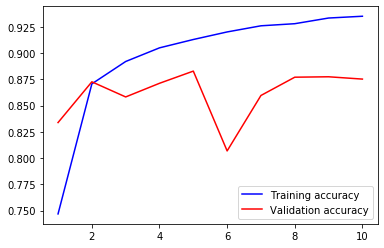

782/782 [==============================] - 16s 21ms/step - loss: 0.3352 - acc: 0.8676
Test loss: 0.3352206349372864 / Test accuracy: 0.8676000237464905


In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.show()

score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')